In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '/media/rym/DATA/RYM/Studies/DSBA/CentraleSupelec/MachineLearning/ML-DSBA-AI-Assignment_2/'

In [2]:
data = pd.read_csv(path + 'train.csv')
data.shape

(891, 12)

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
col_na = []
nb_na = np.zeros(data.shape[1])
for i in range(data.shape[1]):
    col_na.append(data.columns[i])
    nb_na[i] = data.iloc[:,i].isna().sum()
df_na = pd.DataFrame(col_na, nb_na)
df_na

,0
0.0,PassengerId
0.0,Survived
0.0,Pclass
0.0,Name
0.0,Sex
177.0,Age
0.0,SibSp
0.0,Parch
0.0,Ticket
0.0,Fare


In [5]:
df_sex = data[['PassengerId','Survived','Sex']].groupby(['Sex', 'Survived']).count()
df_sex

PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109

In [6]:
print(df_sex.loc[('female',0),])

PassengerId    81
Name: (female, 0), dtype: int64


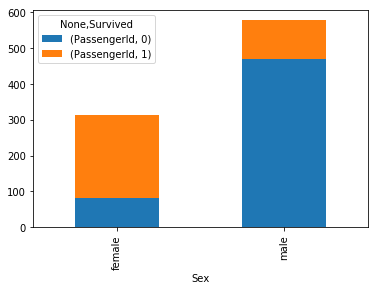

In [7]:
df_sex.unstack().plot(kind='bar', stacked=True)

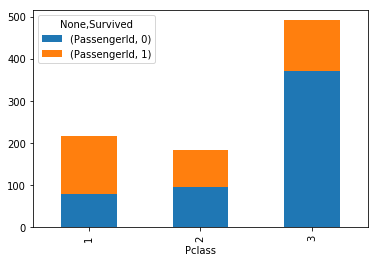

In [8]:
df_class = data[['PassengerId','Survived','Pclass']].groupby(['Pclass', 'Survived']).count()
df_class.unstack().plot(kind='bar', stacked=True)

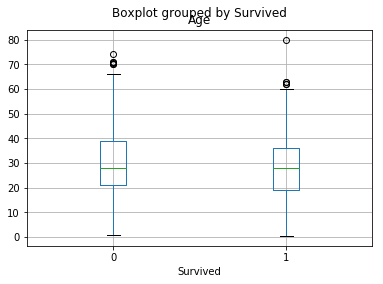

In [9]:
data.boxplot('Age', by='Survived')

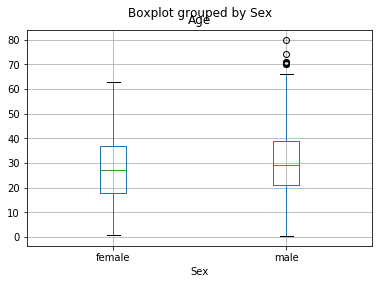

In [10]:
data.boxplot('Age', by='Sex')

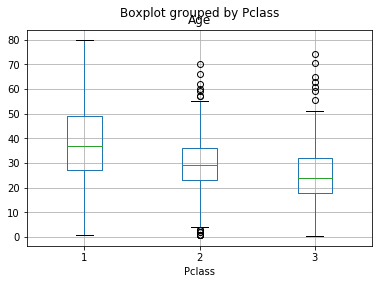

In [11]:
data.boxplot('Age', by='Pclass')

In [23]:
data[['PassengerId', 'Pclass']].where(data['Cabin'].isna()).groupby(['Pclass']).count()

,PassengerId
Pclass,
1.0,40
2.0,168
3.0,479


In [24]:
data[['PassengerId', 'Pclass']].groupby(['Pclass']).count()

,PassengerId
Pclass,
1,216
2,184
3,491
